This notebook applied different machine learning models to the Default of credit card clients dataset as follows: 
1. Decision Tree
2. Random Forest 
3. XG-Boost 
4. ADA-Boost
5. Logistic Regression
6. Ensemble
7. Bagging
8. Feature Engineering

In [122]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import math as m
import warnings 
warnings.filterwarnings(action="ignore")

# Read the data into dataframe
dfs = pd.read_csv("C:/Users/Taha/Downloads/default.csv",skiprows=1)
dfs=dfs.rename(index=str, columns={"default payment next month": "default"})
dfs.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [123]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
default      30000 non-null int64
dtypes: int64(25)
memory usage: 6.0+ MB


# Decision Tree Classification

[[4452  235]
 [ 838  475]]
Total wrong predictions are : 1073 out of 4339
0.6558141322330031


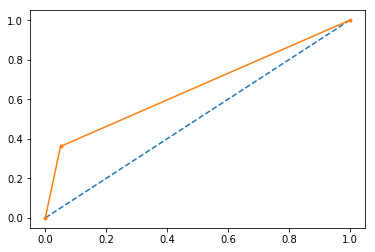

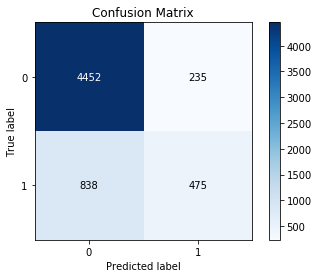

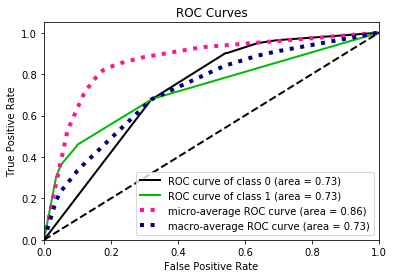

In [124]:
# DECISION TREE 

X=dfs.iloc[:,:-1].values
y=dfs.iloc[:,[24]].values

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

X_train,X_test,y_train,y_test= train_test_split(X, y , test_size=0.2, random_state=42)


# Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 42,max_depth=3)
classifier.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred_prob=classifier.predict_proba(X_test)
probs=y_pred_prob

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Total wrong predictions are : " + str(cm[0,1]+cm[1,0]) + " out of " + str(3808+531))

# RMSE
# from sklearn.metrics import mean_squared_error
# from math import sqrt
# rms = sqrt(mean_squared_error(y_test.flat, y_pred))
# print("root mean squared error is: " + str(rms))

# ROC score  / EVALUATION METRIC

score=roc_auc_score(y_test, y_pred)
print(str(score))
from matplotlib import pyplot

# Plot the ROC / Method 1
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

# Plot the ROC / Method 2 & Confusion Matrix
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
skplt.metrics.plot_roc(y_test,probs)
plt.show()



In [125]:
classifier.score(X_test,y_test)

0.8211666666666667

In [126]:
from sklearn.model_selection import cross_val_score
cross_val_score(classifier, X_train, y_train, cv=5, scoring="accuracy")

array([0.82253697, 0.82586961, 0.81895833, 0.81704522, 0.8180871 ])

# Random Forest Classification

In [127]:
# RANDOM FOREST CLASSIFIER 
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

from sklearn.ensemble import RandomForestClassifier

X_train,X_test,y_train,y_test= train_test_split(X, y , test_size=0.2, random_state=42)

RFC_METRIC = 'gini'  # metric used for RandomForrestClassifier
NO_JOBS = 4         # number of parallel jobs used for RandomForrestClassifier
NUM_ESTIMATORS = 400 # number of estimators used for RandomForrestClassifier


random_clf = RandomForestClassifier(n_jobs=NO_JOBS, random_state=2,criterion=RFC_METRIC,n_estimators=NUM_ESTIMATORS,
                             verbose=False,max_depth=8)
random_clf.fit(X_train, y_train)
random_clf.score(X_test,y_test)

0.8208333333333333

In [128]:
preds = random_clf.predict(X_test)

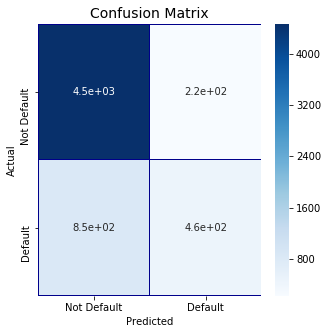

In [129]:
cm = pd.crosstab(y_test.flat, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [130]:
roc_auc_score(y_test.flat, preds)

0.6523112249515806

In [131]:
random_clf.score(X_test,y_test)

0.8208333333333333

In [132]:
# from sklearn.model_selection import cross_val_score
# cross_val_score(random_clf, X_train, y_train, cv=5, scoring="accuracy")

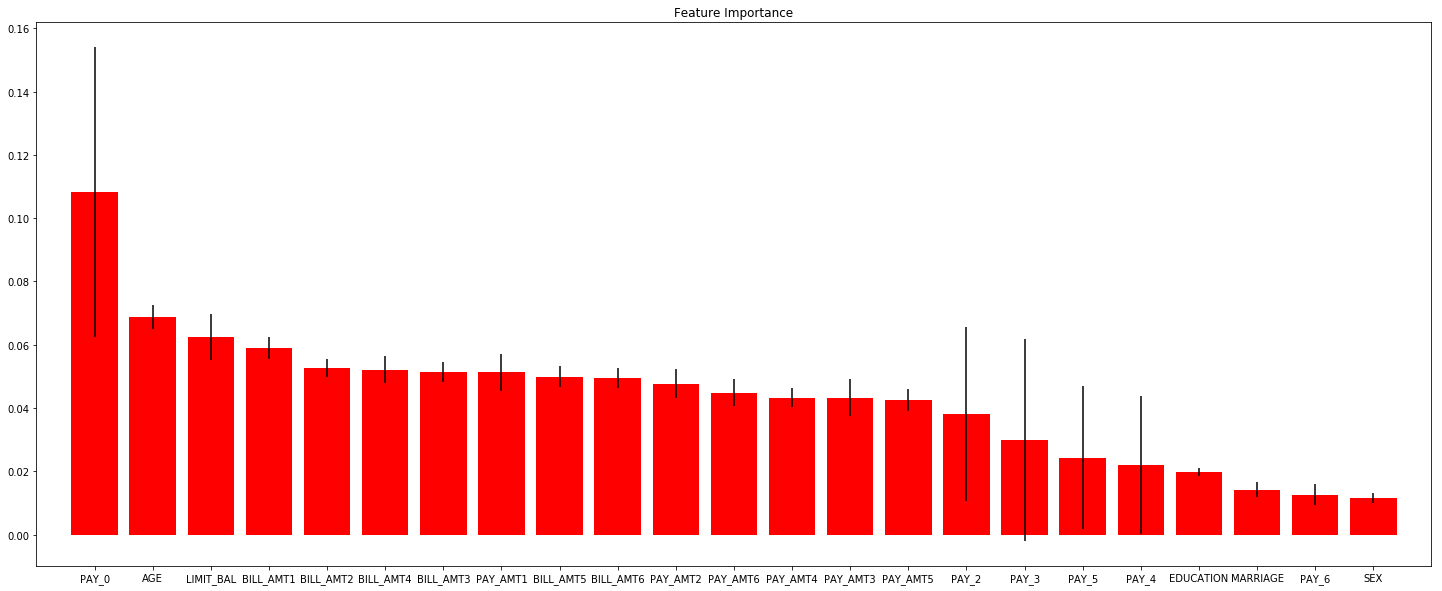

In [134]:
# FEATURE IMPORTANCE
import scikitplot as skplt
rf = RandomForestClassifier()
rf.fit(X, y)
features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
X = dfs[features].copy()
skplt.estimators.plot_feature_importances(rf, feature_names=features, figsize=(25,10),max_num_features=25)
plt.show()

# XG Boost Classification

In [135]:
# XG-BOOST CLASSIFICATION

# Fitting xgboost to training set

X_train,X_test,y_train,y_test= train_test_split(X, y , test_size=0.2, random_state=42)

from xgboost import XGBClassifier

classifier = XGBClassifier( n_estimators=16,max_depth=3,min_child_weight=9 )
classifier.fit(X_train,y_train)


# eval_set = [(X_train, y_train), (X_test, y_test)]
# eval_metric = ["auc","error"]
# %time classifier.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=True)



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=9, missing=None, n_estimators=16,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [136]:
# Test set prediction with xg-boost
y_pred=classifier.predict(X_test)

In [137]:
# Making consfusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[4473,  214],
       [ 865,  448]], dtype=int64)

In [138]:
# Applying k-fold cv
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier, X=X_train,y=y_train, cv=5)


print(accuracies)
print(str(accuracies.mean()))
print(str(accuracies.std()))

[0.82337013 0.82711935 0.81979167 0.81912899 0.81871223]
0.8216244729889818
0.0032033977291311927


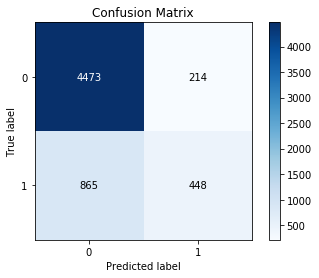

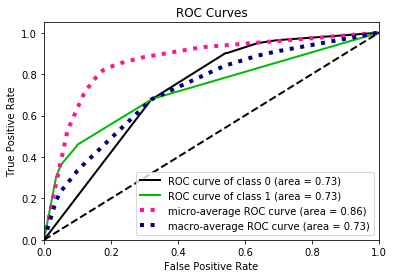

In [139]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
skplt.metrics.plot_roc(y_test,probs)
plt.show()


In [ ]:
# Optimization of xg-boost classifier using random search
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
param_dist = {
      'n_estimators': list(range(10,150)),  
          'max_depth': list(range(1,10)),
            'min_child_weight': list(range(1,10))}

# run randomized search
n_iter_search =20
random_search = RandomizedSearchCV(classifier, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5)


random_search.fit(X_train,y_train)
random_search.best_params_

# ADAboost classification

In [140]:
from sklearn.ensemble  import AdaBoostClassifier
classifier=AdaBoostClassifier(learning_rate=0.001,n_estimators=162, random_state=2)
classifier.fit(X_train, y_train)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.001, n_estimators=162, random_state=2)

In [141]:
y_pred=classifier.predict(X_test)

In [142]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[4498,  189],
       [ 895,  418]], dtype=int64)

In [143]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier, X=X_train,y=y_train, cv=5)


print(accuracies)
print(str(accuracies.mean()))
print(str(accuracies.std()))

[0.82149552 0.82545303 0.818125   0.81725359 0.81600333]
0.819666096182339
0.003418958220070489


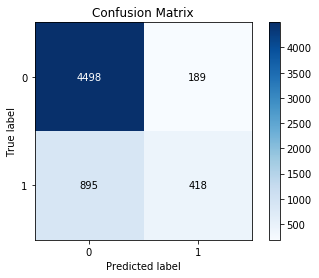

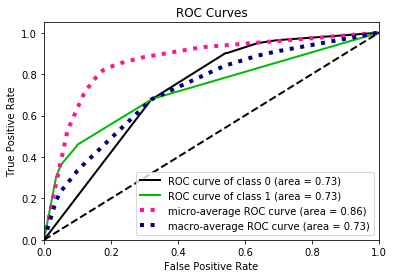

In [144]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
skplt.metrics.plot_roc(y_test,probs)
plt.show()


In [ ]:
# Optimization for ADAboost classifier using randomsearch
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
param_dist = {
      'n_estimators': list(range(50,200)),  
    'random_state':[2],
        'learning_rate':[0.1,0.01,0.001,0.009,0.0001,0.05,0.04,0.03,0.2,0.3]}

# run randomized search
n_iter_search =20
random_search = RandomizedSearchCV(classifier, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5)


random_search.fit(X_train,y_train)
random_search.best_params_

# Logistic Regression

In [145]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty='l2',dual=False,max_iter=145,C=2,fit_intercept=False)


In [146]:
X_train,X_test,y_train,y_test= train_test_split(X, y , test_size=0.2, random_state=42)

classifier.fit(X_train,y_train)

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=145, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [147]:
y_pred=classifier.predict(X_test)

In [148]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[4687,    0],
       [1313,    0]], dtype=int64)

In [149]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier, X=X_train,y=y_train, cv=5)


print(accuracies)
print(str(accuracies.mean()))
print(str(accuracies.std()))

[0.77817121 0.77796292 0.77791667 0.77891227 0.77828714]
0.7782500443865759
0.0003576915838719232


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
param_dist = {
      'C': [1,1.5,2,2.5,3],  
      'dual':[True,False],
       'fit_intercept': [True,False],
        'max_iter': list(range(20,150))}

# run randomized search
n_iter_search =20
random_search = RandomizedSearchCV(classifier, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5)


random_search.fit(X_train,y_train)
random_search.best_params_

# Ensemble

In [150]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble  import AdaBoostClassifier
from xgboost import XGBClassifier

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
dt_clf=DecisionTreeClassifier()
xgboost_clf = XGBClassifier()
adaboost_clf=AdaBoostClassifier()
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('dt', dt_clf),('xg',xgboost_clf),('ada',adaboost_clf)],
voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('rf', RandomFo...m='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [151]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, dt_clf, voting_clf,xgboost_clf,adaboost_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.7811666666666667
RandomForestClassifier 0.808
DecisionTreeClassifier 0.7228333333333333
VotingClassifier 0.818
XGBClassifier 0.8206666666666667
AdaBoostClassifier 0.816


# Bagging

In [152]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(
RandomForestClassifier(), n_estimators=500,
bootstrap=True, n_jobs=-1, oob_score=True)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_


0.819375

In [153]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)


0.8195

In [154]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(
DecisionTreeClassifier(), n_estimators=500,
bootstrap=True, n_jobs=-1, oob_score=True)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_


0.8164166666666667

In [155]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8153333333333334

# Feature Engineering

In [195]:
data = pd.read_csv("D:\Download_Ddrive\default.csv",skiprows=1)
data=data.rename(index=str, columns={"default payment next month": "default"})


# FEATURE 1
data['feature_1'] =dfs.PAY_0 + dfs.PAY_2 + dfs.PAY_3
feature_1 =dfs.PAY_0 + dfs.PAY_2 + dfs.PAY_3
data.drop(labels=['feature_1'],axis=1,inplace=True)
data.insert(24,'feature_1',feature_1)
data.head()


# FEATURE 2
def f(row):
    if row['PAY_0'] ==-2 or row['PAY_2']== -2 or row['PAY_3']==-2 :
        val = 1
    elif row['PAY_0'] == 2 or row['PAY_2'] == 2 or row['PAY_3']==2:
        val= 0
    else:
        val=0
    return val
data['feature_2']=data.apply(f,axis=1)
feature_2=data.apply(f,axis=1)
data.drop(labels=['feature_2'],axis=1,inplace=True)
data.insert(25,'feature_2',feature_2)
   
    
# FEATURE 3    
data['feature_3']=dfs.PAY_AMT6 - dfs.BILL_AMT6
feature_3 =dfs.BILL_AMT6- dfs.PAY_AMT6
data.drop(labels=['feature_3'],axis=1,inplace=True)
data.insert(26,'feature_3',feature_3)
data.head()

# FEATURE 4
data['feature_4']=dfs.PAY_AMT1 - dfs.BILL_AMT1
feature_4 =dfs.BILL_AMT1 - dfs.PAY_AMT1  
data.drop(labels=['feature_4'],axis=1,inplace=True)
data.insert(27,'feature_4',feature_4)
data.head()
    
    
    
    
data.head(15)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,feature_1,feature_2,feature_3,feature_4,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,3,0,0,3913,1
1,2,120000,2,2,2,26,-1,2,0,0,...,1000,1000,1000,0,2000,1,0,1261,2682,1
2,3,90000,2,2,2,34,0,0,0,0,...,1500,1000,1000,1000,5000,0,0,10549,27721,0
3,4,50000,2,2,1,37,0,0,0,0,...,2019,1200,1100,1069,1000,0,0,28547,44990,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,36681,10000,9000,689,679,-2,0,18452,6617,0
5,6,50000,1,1,2,37,0,0,0,0,...,1815,657,1000,1000,800,0,0,19224,61900,0
6,7,500000,1,1,2,29,0,0,0,0,...,40000,38000,20239,13750,13770,0,0,460174,312965,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,601,0,581,1687,1542,-2,0,-975,11496,0
8,9,140000,2,3,1,28,0,0,2,0,...,0,432,1000,1000,1000,2,0,2719,7956,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,0,13007,1122,0,-6,1,13912,0,0


In [205]:
# XGboost after feature engineering

# Fitting xgboost to training set
X=data.iloc[:,:-1].values
y=data.iloc[:,[-1]].values

X_train,X_test,y_train,y_test= train_test_split(X, y , test_size=0.2, random_state=42)

from xgboost import XGBClassifier

classifier = XGBClassifier(n_estimators= 100, min_child_weight= 1, max_depth= 3,random_state=42)
classifier.fit(X_train,y_train)

# Test set prediction with xg-boost
y_pred=classifier.predict(X_test)

# Making consfusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm
# Applying k-fold cv
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier, X=X_train,y=y_train, cv=5)


print(accuracies)
print(str(accuracies.mean()))
print(str(accuracies.std()))


from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

# # Optimization of xg-boost classifier using random search
# from sklearn.model_selection import RandomizedSearchCV, cross_val_score
# param_dist = {
#       'n_estimators': list(range(10,150)),  
#           'max_depth': list(range(1,10)),
#             'min_child_weight': list(range(1,10))}

# # run randomized search
# n_iter_search =20
# random_search = RandomizedSearchCV(classifier, param_distributions=param_dist,
#                                    n_iter=n_iter_search, cv=5)


# random_search.fit(X_train,y_train)
# random_search.best_params_

[0.82149552 0.82899396 0.82104167 0.81954574 0.81996249]
0.8222078757812301
0.0034654623581305277


array([[4454,  233],
       [ 847,  466]], dtype=int64)

In [197]:
# Ensemble after feature engineering
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble  import AdaBoostClassifier
from xgboost import XGBClassifier

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
dt_clf=DecisionTreeClassifier()
xgboost_clf = XGBClassifier()
adaboost_clf=AdaBoostClassifier()
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('dt', dt_clf),('xg',xgboost_clf),('ada',adaboost_clf)],
voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('rf', RandomFo...m='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [198]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, dt_clf, voting_clf,xgboost_clf,adaboost_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.7811666666666667
RandomForestClassifier 0.8051666666666667
DecisionTreeClassifier 0.7261666666666666
VotingClassifier 0.8173333333333334
XGBClassifier 0.82
AdaBoostClassifier 0.8168333333333333


In [199]:
# ADAboost after feature engineering

from sklearn.ensemble  import AdaBoostClassifier
classifier=AdaBoostClassifier()
classifier.fit(X_train, y_train)


y_pred=classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier, X=X_train,y=y_train, cv=5)


print(accuracies)
print(str(accuracies.mean()))
print(str(accuracies.std()))

[0.82128723 0.82316184 0.81854167 0.81975412 0.81829548]
0.8202080666883564
0.0018182594507536235
